In [180]:
import numpy as np
import matplotlib.pyplot as plt
import magpylib as mag
from matplotlib import rcParams
import scipy as sp 
from scipy.special import ellipk, ellipe


COLOR = 'black'
rcParams['text.color'] = COLOR
rcParams['text.color'] = COLOR
rcParams['axes.labelcolor'] = COLOR
rcParams['xtick.color'] = COLOR
rcParams['ytick.color'] = COLOR
rcParams['grid.color'] = COLOR
rcParams['text.latex.preamble'] = "\n".join([
    r'\usepackage[version=3]{mhchem}'
])

# axes
rcParams['axes.grid'] = True
rcParams['axes.grid.axis'] = 'both'
rcParams['axes.axisbelow'] = True
rcParams['axes.facecolor'] = 'lightgray'

# figure:
rcParams['figure.autolayout'] = True
rcParams['figure.dpi'] = 100
rcParams['figure.figsize'] = [8, 6]


# fontsizes
rcParams['xtick.labelsize'] = 12
rcParams['ytick.labelsize'] = 12
rcParams['legend.fontsize'] = 12
rcParams['legend.title_fontsize'] = 12
rcParams['axes.labelsize'] = 18
rcParams['axes.titlesize'] = 20

rcParams['font.family'] = 'serif'
rcParams['mathtext.fontset'] = 'cm'

# legend
# rcParams['legend.framealpha'] = 1
rcParams['legend.fancybox'] = False
rcParams['legend.edgecolor'] = 'gray'


# save
rcParams['savefig.bbox'] = 'tight'


### Campo de una espira con los parámetros del problema

In [181]:
# params:
u0 = 1
I = -1
b = u0*I/(2*np.pi)
a = 0.39
d = a

# coord:
c_z = np.linspace(-0.4, 0.4, 100)
c_rho = np.linspace(-0.4, 0.4, 100)
rho, z = np.meshgrid(c_rho, c_z, indexing='xy')

def B(rho, z, a, b):
    k_sq = 4*a*rho/((a + rho)**2 + z**2)
    c = 1/np.sqrt((a + rho)**2 + z**2)

    B_rho = b*c*(z/rho)*((a**2 + rho**2 + z**2)*ellipe(k_sq)/((a - rho)**2 + z**2) - ellipk(k_sq))
    B_z = b*c*((a**2 - rho**2 - z**2)*ellipe(k_sq)/((a - rho)**2 + z**2) - ellipk(k_sq))

    B_spire = np.meshgrid(B_rho, B_z, indexing='xy') 
    return np.array([B_rho, B_z]) # me queda juntar esto para q sea una matriz de la misma forma que grid

B_spire = B(rho, z, a, b)

(100, 100)


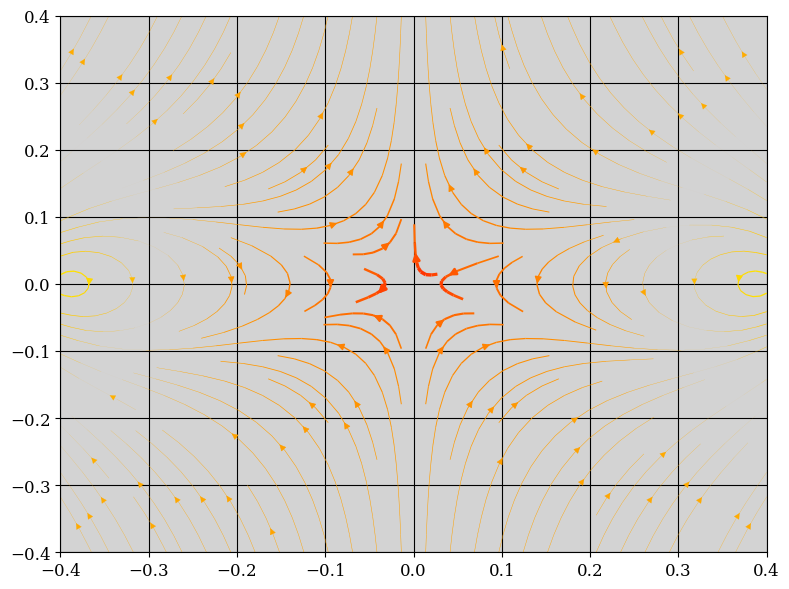

In [182]:
fig, ax = plt.subplots()

log10_norm_B = np.log10(np.linalg.norm(B_spire, axis=0))
print(log10_norm_B.shape)

splt = ax.streamplot(
    rho,
    z,
    B_spire[0],
    B_spire[1],
    color=log10_norm_B,
    density=1,
    linewidth=log10_norm_B,
    cmap="autumn",
)

### Campo de una bobina con los parámetros del problema

In [183]:
# params:
u0 = 1
I = 1
b = -u0*I/2*np.pi
a = 0.39
d = a

# coord:
c_z = np.linspace(-0.4, 0.4, 100)
c_rho = np.linspace(-0.4, 0.4, 100)
rho, z = np.meshgrid(c_rho, c_z, indexing='xy')

entorno_menos = np.linspace(-d/2 - 5e-3,-d/2 + 5e-3,8)
entorno_mas = np.linspace(d/2 - 5e-3,d/2 + 5e-3,8)

B_bobina_minus = np.zeros(np.shape(B_spire))  # esto es para salir del paso pq ya me cuesta pensar nomás
B_bobina_plus = np.zeros(np.shape(B_spire))

for i in entorno_menos:
    z_minus = z - i
    B_minus = B(rho, z_minus, a , b)
    B_bobina_minus += B_minus

for i in entorno_mas:
    z_plus = z - i
    B_plus = B(rho, z_plus, a , b)
    B_bobina_plus += B_plus

B_par = B_bobina_minus + B_bobina_plus

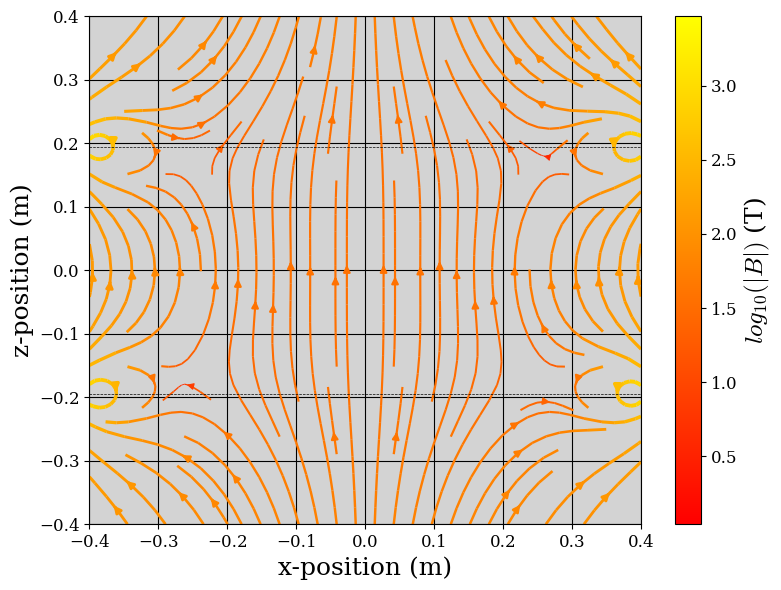

In [184]:
fig, ax = plt.subplots()

log10_norm_B = np.log10(np.linalg.norm(B_par, axis=0))

# Display the B-field with streamplot using log10-scaled
# color function and linewidth
splt = ax.streamplot(
    rho,
    z,
    B_par[0],
    B_par[1],
    color=log10_norm_B,
    density=1,
    linewidth=log10_norm_B,
    cmap="autumn",
)

# Add colorbar with logarithmic labels
cb = fig.colorbar(splt.lines, ax=ax, label="$log_{10}(|B|)$ (T)")

# Figure styling
ax.set(
    xlabel="x-position (m)",
    ylabel="z-position (m)",
)
ax.axhline(d/2, color='k', linestyle='dashed', linewidth=0.5)
ax.axhline(-d/2, color='k', linestyle='dashed', linewidth=0.5)

plt.tight_layout()